In [1]:
!pip install -U tensorflow_datasets

  Using cached https://files.pythonhosted.org/packages/6c/34/ff424223ed4331006aaa929efc8360b6459d427063dc59fc7b75d7e4bab3/tensorflow_datasets-1.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/52/e20466b85000a181e1e144fd8305caf2cf475e2f9674e797b222f8105f5f/future-0.17.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/ea/79/bfb672fc4ad09297f61734992c2658f753fc3d508701c5b5c47390de0ee2/tensorflow_metadata-0.14.0-py2.py3-none-any.whl
  Stored in directory: C:\Users\Alex\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Stored in directory: C:\Users\Alex\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built dill future


In [5]:
!pip install matplotlib

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()

1.13.1


In [7]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Importing the Fashion Mnist Dataset

In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to C:\Users\Alex\tensorflow_datasets\fashion_mnist\1.0.0. Subsequent calls will reuse this data.


W0929 13:54:46.988784 19032 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [10]:
# Exploring the data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [11]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

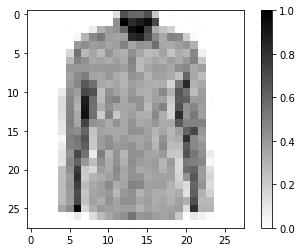

In [12]:
# Explore processed data
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

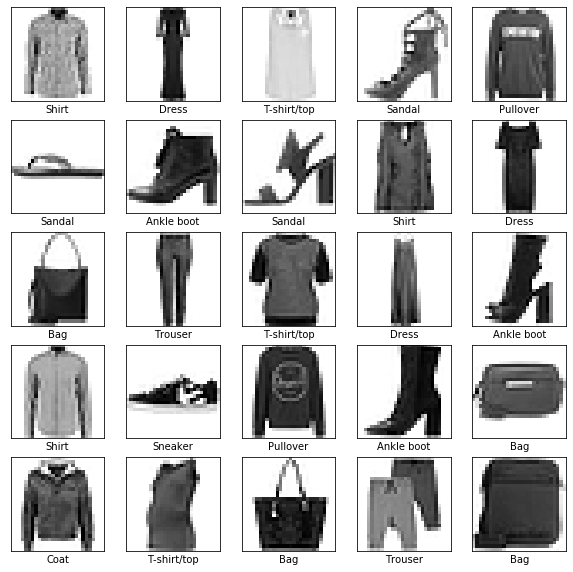

In [13]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Building the Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [17]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1218/1875 [==================>...........] - ETA: 2:59:00 - loss: 2.3456 - acc: 0.06 - ETA: 25:44 - loss: 1.9560 - acc: 0.3705 - ETA: 13:57 - loss: 1.7303 - acc: 0.44 - ETA: 9:36 - loss: 1.5591 - acc: 0.5066 - ETA: 7:20 - loss: 1.4262 - acc: 0.543 - ETA: 5:57 - loss: 1.3419 - acc: 0.557 - ETA: 5:00 - loss: 1.2893 - acc: 0.570 - ETA: 4:14 - loss: 1.2066 - acc: 0.599 - ETA: 3:49 - loss: 1.1640 - acc: 0.612 - ETA: 3:25 - loss: 1.1182 - acc: 0.625 - ETA: 3:06 - loss: 1.0803 - acc: 0.632 - ETA: 2:53 - loss: 1.0618 - acc: 0.636 - ETA: 2:39 - loss: 1.0313 - acc: 0.645 - ETA: 2:28 - loss: 1.0036 - acc: 0.654 - ETA: 2:16 - loss: 0.9782 - acc: 0.664 - ETA: 2:06 - loss: 0.9631 - acc: 0.671 - ETA: 1:59 - loss: 0.9473 - acc: 0.676 - ETA: 1:53 - loss: 0.9322 - acc: 0.682 - ETA: 1:45 - loss: 0.9138 - acc: 0.688 - ETA: 1:40 - loss: 0.8992 - acc: 0.695 - ETA: 1:35 - loss: 0.8864 - acc: 0.697 - ETA: 1:32 - loss: 0.8747 - acc: 0.701 - ETA: 1:27 - loss: 0.8583 - acc: 0.708 - ETA: 1:23 - loss: 0.

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - ETA: 5s - loss: 0.3388 - acc: 0.875 - ETA: 1s - loss: 0.3345 - acc: 0.886 - ETA: 1s - loss: 0.3601 - acc: 0.871 - ETA: 1s - loss: 0.3746 - acc: 0.863 - ETA: 1s - loss: 0.3678 - acc: 0.873 - ETA: 1s - loss: 0.3821 - acc: 0.868 - ETA: 1s - loss: 0.3697 - acc: 0.874 - ETA: 1s - loss: 0.3688 - acc: 0.874 - ETA: 1s - loss: 0.3623 - acc: 0.874 - ETA: 1s - loss: 0.3640 - acc: 0.874 - ETA: 1s - loss: 0.3620 - acc: 0.873 - ETA: 1s - loss: 0.3646 - acc: 0.872 - ETA: 0s - loss: 0.3707 - acc: 0.871 - ETA: 0s - loss: 0.3701 - acc: 0.869 - ETA: 0s - loss: 0.3673 - acc: 0.869 - ETA: 0s - loss: 0.3663 - acc: 0.869 - ETA: 0s - loss: 0.3636 - acc: 0.872 - ETA: 0s - loss: 0.3635 - acc: 0.872 - ETA: 0s - loss: 0.3605 - acc: 0.873 - ETA: 0s - loss: 0.3625 - acc: 0.871 - ETA: 0s - loss: 0.3668 - acc: 0.870 - ETA: 0s - loss: 0.3666 - acc: 0.871 - ETA: 0s - loss: 0.3652 - acc: 0.871 - ETA: 0s - loss: 0.3688 - acc: 0.869 - ETA: 0s - loss: 0.3679 - acc: 0.869 - ETA: 0s

In [20]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8684


### Making predictions

In [21]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [22]:
predictions.shape


(32, 10)

In [23]:
predictions[0]

array([1.5570597e-05, 8.9356348e-08, 2.2495992e-03, 5.0570503e-05,
       5.4926641e-02, 4.2876326e-07, 9.4274563e-01, 5.0308365e-08,
       1.1461170e-05, 3.2107998e-08], dtype=float32)

In [24]:
np.argmax(predictions[0])

6

In [25]:
test_labels[0]

6

In [26]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

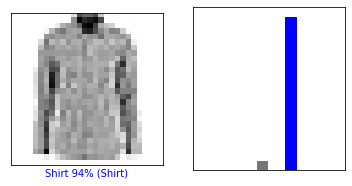

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

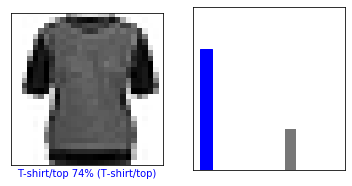

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

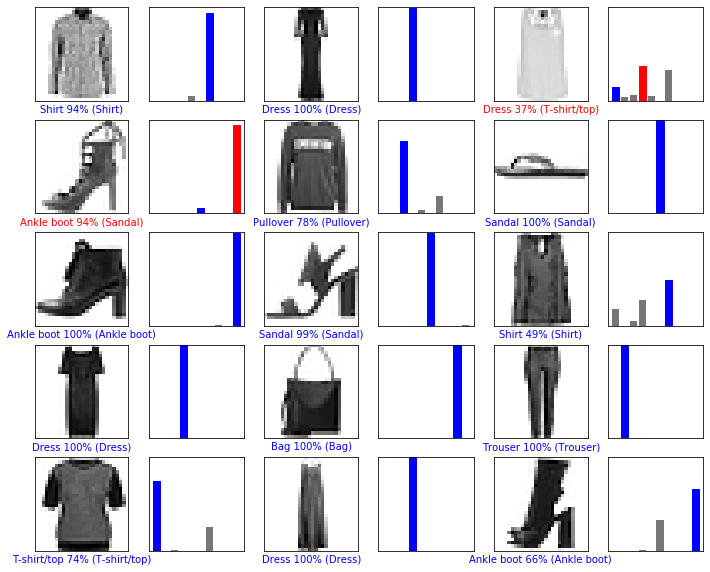

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [30]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [31]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5570626e-05 8.9356526e-08 2.2495992e-03 5.0570554e-05 5.4926664e-02
  4.2876368e-07 9.4274563e-01 5.0308365e-08 1.1461170e-05 3.2108062e-08]]


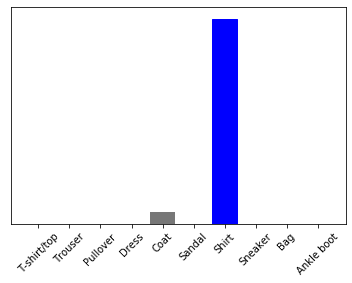

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

6